# Aprendizaje Automático - Online News Popularity - Regresión



---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ejecutar completamente este documento no es instantáneo, lleva algunos minutos, entorno a 5 minutos, pero siempre termina de ejecutarse, no se queda de forma indefinida y siempre termina mucho antes de llegar a los 10 minutos.

#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos.

Este problema de regresión se trata de, a partir de las muestras de entrenamiento y test obtenidas de una base de datos proporcionada, donde cada muestra contiene información sobre artículos publicados por "Mashable" en un periodo de dos años, se busca aprender una función $g$ que estime el número de comparticiones en redes sociales que obtendrá un artículo.
   
Cada muestra posee 60 atributos, cada uno representando un dato del artículo , y una etiqueta representando el número de comparticiones. Por lo tanto cada muestra $n$ se identificará como un vector $x_n$ con 60 valores, que son todos números, y tiene una etiqueta asociada representada por un valor numérico $y \geq 0$, que tiene que ser mayor o igual que cero ya que no debería poder tener un número negativo de comparticiones. Entonces $X$ será el vector de muestras $x_n$ y el elemento $Y$ será el vector de etiquetas $y$.
  
Para aprender la función $g$ se empleará un algoritmo de aprendizaje automático que utilice el conjunto de entrenamiento para ajustar el vector $w$ de prámetros (pesos) del modelo (sobre una clase de funciones $\mathcal{H}$), minimizando el error asociado al algoritmo de las soluciones calculadas. Como resultado de aplicar el algoritmo al problema, obtendremos una función $g$ solución que para cualquier muestra $x$ del espacio total de las posibles muestras, nos proporcione una etiqueta $y$ que será la predicción de la estimación de la muestra. Finalmente se utilizará el conjunto de muestras de test para evaluar el error fuera de la muestra de entrenamiento.   

Durante el proceso de aprendizaje el conjunto de datos puede modificarse, tratando de no afectar la importancia e información que ofrecen los datos, para obtener mejores resultados a la hora de aplicar los algorimtos de aprendizaje automático que utilicemos para encontrar el mejor clasificador para el problema.

Todas las variables del conjunto de datos son:

| Número | Nombre                           | Descripción                                                                                         |
|--------|----------------------------------|-----------------------------------------------------------------------------------------------------|
| 0      | url                              | URL of the article (non-predictive)                                                                 |
| 1      | timedelta                        | Days between the article publication and the dataset acquisition (non-predictive)                   |
| 2      | n_tokens_title                   | Number of words in the title                                                                        |
| 3      | n_tokens_content                 | Number of words in the content                                                                      |
| 4      | n_unique_tokens                  | Rate of unique words in the content                                                                 |
| 5      | n_non_stop_words                 | Rate of non-stop words in the content                                                               |
| 6      | n_non_stop_unique_tokens         | Rate of unique non-stop words in the content                                                        |
| 7      | num_hrefs                        | Number of links                                                                                     |
| 8      | num_self_hrefs                   | Number of links to other articles published by Mashable                                             |
| 9      | num_imgs                         | Number of images                                                                                    |
| 10     | num_videos                       | Number of videos                                                                                    |
| 11     | average_token_length             | Average length of the words in the content                                                          |
| 12     | num_keywords                     | Number of keywords in the metadata                                                                  |
| 13     | data_channel_is_lifestyle        | Is data channel 'Lifestyle'?                                                                        |
| 14     | data_channel_is_entertainment    | Is data channel 'Entertainment'?                                                                    |
| 15     | data_channel_is_bus              | Is data channel 'Business'?                                                                         |
| 16     | data_channel_is_socmed           | Is data channel 'Social Media'?                                                                     |
| 17     | data_channel_is_tech             | Is data channel 'Tech'?                                                                             |
| 18     | data_channel_is_world            | Is data channel 'World'?                                                                            |
| 19     | kw_min_min                       | Worst keyword (min. shares)                                                                         |
| 20     | kw_max_min                       | Worst keyword (max. shares)                                                                         |
| 21     | kw_avg_min                       | Worst keyword (avg. shares)                                                                         |
| 22     | kw_min_max                       | Best keyword (min. shares)                                                                          |
| 23     | kw_max_max                       | Best keyword (max. shares)                                                                          |
| 24     | kw_avg_max                       | Best keyword (avg. shares)                                                                          |
| 25     | kw_min_avg                       | Avg. keyword (min. shares)                                                                          |
| 26     | kw_max_avg                       | Avg. keyword (max. shares)                                                                          |
| 27     | kw_avg_avg                       | Avg. keyword (avg. shares)                                                                          |
| 28     | self_reference_min_shares        | Min. shares of referenced articles in Mashable                                                      |
| 29     | self_reference_max_shares        | Max. shares of referenced articles in Mashable                                                      |
| 30     | self_reference_avg_sharess       | Avg. shares of referenced articles in Mashable                                                      |
| 31     | weekday_is_monday                | Was the article published on a Monday?                                                              |
| 32     | weekday_is_tuesday               | Was the article published on a Tuesday?                                                             |
| 33     | weekday_is_wednesday             | Was the article published on a Wednesday?                                                           |
| 34     | weekday_is_thursday              | Was the article published on a Thursday?                                                            |
| 35     | weekday_is_friday                | Was the article published on a Friday?                                                              |
| 36     | weekday_is_saturday              | Was the article published on a Saturday?                                                            |
| 37     | weekday_is_sunday                | Was the article published on a Sunday?                                                              |
| 38     | is_weekend                       | Was the article published on the weekend?                                                          |
| 39     | LDA_00                           | Closeness to LDA topic 0                                                                            |
| 40     | LDA_01                           | Closeness to LDA topic 1                                                                            |
| 41     | LDA_02                           | Closeness to LDA topic 2                                                                            |
| 42     | LDA_03                           | Closeness to LDA topic 3                                                                            |
| 43     | LDA_04                           | Closeness to LDA topic 4                                                                            |
| 44     | global_subjectivity              | Text subjectivity                                                                                   |
| 45     | global_sentiment_polarity        | Text sentiment polarity                                                                             |
| 46     | global_rate_positive_words       | Rate of positive words in the content                                                               |
| 47     | global_rate_negative_words       | Rate of negative words in the content                                                               |
| 48     | rate_positive_words              | Rate of positive words among non-neutral tokens                                                     |
| 49     | rate_negative_words              | Rate of negative words among non-neutral tokens                                                     |
| 50     | avg_positive_polarity            | Avg. polarity of positive words                                                                      |
| 51     | min_positive_polarity            | Min. polarity of positive words                                                                      |
| 52     | max_positive_polarity            | Max. polarity of positive words                                                                      |
| 53     | avg_negative_polarity            | Avg. polarity of negative words                                                                      |
| 54     | min_negative_polarity            | Min. polarity of negative words                                                                      |
| 55     | max_negative_polarity            | Max. polarity of negative words                                                                      |
| 56     | title_subjectivity               | Title subjectivity                                                                                  |
| 57     | title_sentiment_polarity         | Title polarity                                                                                      |
| 58     | abs_title_subjectivity           | Absolute subjectivity level                                                                          |
| 59     | abs_title_sentiment_polarity     | Absolute polarity level                                                                             |
| 60     | shares                           | Number of shares (target)                                                                           |


>Acceder a los datos:



In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Primera parte de los datos (parte de entrenamiento)
file_path = 'drive/MyDrive/Colab Notebooks/datos/OnlineNewsPopularity.csv'

datos = np.genfromtxt(file_path, delimiter=",") #Funcion cargar datos desde txt, y en este caso desde csv

x = datos[:, :-1]  # todas las columnas excepto la última
y = datos[:, -1]   # ultima columna donde estan las etiquetas
x = np.array(x, np.float64)
y = np.array(y, np.float64)

# Mostrar dimension del conjunto de muestras total
print("Forma de vector X de muestras:", x.shape)
print("Forma de vector Y de etiquetas:", y.shape)

Forma de vector X de muestras: (39645, 60)
Forma de vector Y de etiquetas: (39645,)


Analizando el conjunto de datos he observado que las dos primeras variables son información no predictiva de las muestras ya que se tratan de la url y los días trascurridos desde la publicación hasta que se obtuvo la base de datos, por lo tanto se pueden eliminar. También observamos que la variable número 38 representa si el día es fin de semana, y como ya tenemos las dos variables anteriores que representan si el día es sabado o domingo, esta variable depende directamente de las otras, y por tanto puede eliminarse ya que no aporta más información útil al conjunto de datos. Además también he visto que la primera fila del conjunto se trata de los nombres de las columnas y por tanto hay que eliminar esa fila.

In [ ]:
# Eliminar la primer fila con los titulos
indices_elim = [0]
x = np.delete(x, indices_elim, axis=0)
y = np.delete(y, indices_elim, axis=0)

# Mostrar dimension del conjunto de muestras total
print("Forma de vector X de muestras:", x.shape)
print("Forma de vector Y de etiquetas:", y.shape)

Forma de vector X de muestras: (39644, 60)
Forma de vector Y de etiquetas: (39644,)


In [ ]:
# Eliminar las variables no predictivas y redundantes
indices_elim = [0,1,38]
x = np.delete(x, indices_elim, axis=1)

# Mostrar dimension del conjunto de muestras total
print("Forma de vector X de muestras:", x.shape)
print("Forma de vector Y de etiquetas:", y.shape)

Forma de vector X de muestras: (39644, 57)
Forma de vector Y de etiquetas: (39644,)


Después de obtener el conjunto total de datos separamos los datos en un conjunto de entrenamiento y otro de test. Realizamos esto lo primero para evitar observar los datos de test y realizar "Data Snooping" donde el conjunto de datos podría influenciar nuestra elección sobre el modelo a utilizar para resolver el problema de aprendizaje automático. Para separar las muestras en train y test, dos distribuciones muy comunes en la práctica son 70% de train y 30% de test, y 80% de train y 20% de test. Al utilizar una distribución 70-30 obtendríamos una estimación mejor del error $E_{out}$ a partir del error $E_{test}$ que con la de 80-20, ya que se utilizaría un número mayor de muestras para obtener la estimación, un 30% del total, que en la otra distribución que usaría un 20% del total. Sin embargo, al utilizar una distribución 80-20 obtendríamos un mejor ajuste del problema al entrenar el modelo de aprendizaje con más datos que con la otra distribución, teniendo una mejor generalización en el conjunto de entrenamiento de la función que tratamos de aproximar. En general cuantos más datos se utilicen en test mejor será la estimación del error  $E_{out}$ y cuantos más datos se utilicen en el entrenamiento, el clasificador calculado se ajustará mejor al problema, ya que tiene más datos con los que aprender.  
En este caso he elegido una distribución de 80% para entrenamiento y 20% de test, teniendo en cuenta que con esta distribución se tiene un número menor de datos para estimar el error  $E_{out}$, pero se tiene un número mayor de datos para entrenar y para utilizar Cross-Validation con un conjunto de datos mayor.

In [ ]:
np.random.seed(0)
trainPortion = 0.8 #porcentaje de train, el porcentaje de test será la resta de 1 menos el porcentaje de train

#-------------Obtener índices

indexesData = np.arange(len(y)) #Indices del conjunto de muestras
#-------------Desordenar indices y separar en rain y test

np.random.shuffle(indexesData) #Desordenar indices de las muestras
numberTrain = round(len(indexesData)*trainPortion) #numero de muestras para train
trainIndexes = indexesData[:numberTrain]
testIndexes = indexesData[numberTrain:]

#-------------Datos desorden:ados para train y test

trainX = x[trainIndexes]
testX = x[testIndexes]
trainY = y[trainIndexes]
testY = y[testIndexes]

#-------------Copia de los datos para mantener datos originales después del preprocesado

original_trainX = trainX.copy()
original_testX = testX.copy()
original_trainY = trainY.copy()
original_testY = testY.copy()

#-------------Mostrar resultados

print('Muestras totales:  {}'.format(len(trainY)+len(testX)))
print('Muestras train:  {}'.format(len(trainY)))
print('Muestras test:  {}'.format(len(testX)))


Muestras totales:  39644
Muestras train:  31715
Muestras test:  7929


Se podría utilizar la función `train_test_split()` de scikit-learn que ofrece un comportamiento similar al código implementado. Como podemos observar, tenemos un total de 39644 muestras, de los cuales 31715 , que representan el 80% del total, serán utilizados para entrenamiento y el resto 7929 (20% del total) para test.

>**Datos faltantes:**

Para ver si faltan datos en nuestro conjunto de datos, vamos a utilizar la función `isnull()` de la librería pandas para contar el número de datos que faltan en el conjunto. Esta función detecta si algún valor en el conjunto de datos es del tipo no numéricos o de valor nulo y devuelve una matriz de la misma forma que el conjunto de datos que recibe como parámetro, en el que cada posición devuelve verdadero si falta el dato o falso si no falta el dato:

In [ ]:
dfTrainX = pd.DataFrame(trainX) #crear dataframe para utilizar las funciones de al libreria de Pandas
num_missing = np.sum(dfTrainX.isnull().values)
print("Número de datos faltantes: ", num_missing)

Número de datos faltantes:  0


Como podemos observar no existen datos faltantes en nuestro conjunto de datos y por tanto no hay que realizar ninguna acción al respecto ya que no tenemos ningún problema de datos faltantes.

>**Desequilibrio en los datos:**

Vamos a observar el histograma del conjunto de muestras para ver si existe un desequilibrio en los datos en cuanto a los valores de las etiquetas en el conjunto de entrenamiento (el conjunto de test no lo utilizamos hasta que tengamos que evaluar la mejor hipótesis seleccionada, para evitar realizar Data-Snooping):

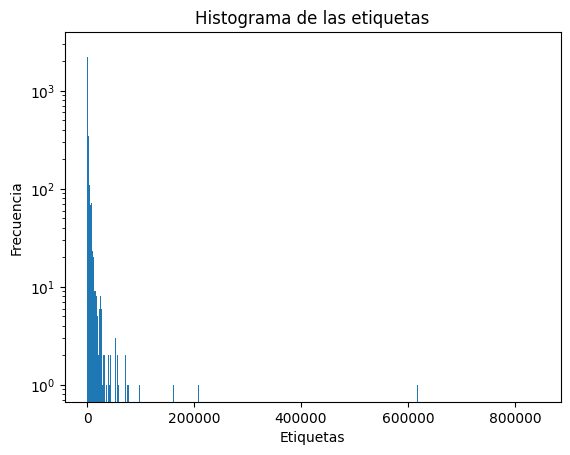

In [ ]:
# Dibujar el histograma
plt.hist(trainY, bins='auto')

plt.yscale('log') #Escala logarítmica del eje y
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.title('Histograma de las etiquetas')

# Mostrar el histograma
plt.show()

Analizando los datos vemos en el histograma de las etiquetas que existen algunos valores extremos en cuanto al número de visitas. Estos datos pueden parecer outliers, datos atípicos producidos por algún error en la medición o por ruido, pero teniendo en cuenta la naturzaleza del problema, como se trata del número de comparticiones en redes sociales, pueden ser datos reales de artículos con mayor éxito y por tanto estos datos pueden ayudar al aprendizaje y son datos que el clasificador tiene que intentar predecir. Por lo tanto estos datos no se van a eliminar del conjunto de datos como si fueran outliers.  

 Para ver mejor el histograma en la zona donde se concentran la mayoría de datos vamos a calcular los percentiles 0 y 97.5 ya que las etiquetas tiene valor mayor o igual a cero (al ser comparticiones en redes sociales) y los valores menos frecuentes están muy alejados del valor 0, en el extremo superior del conjunto de posibles etiquetas. Por lo tanto voy a visualizar el 97.5% de los datos con menor valor en la etiqueta en un histograma:

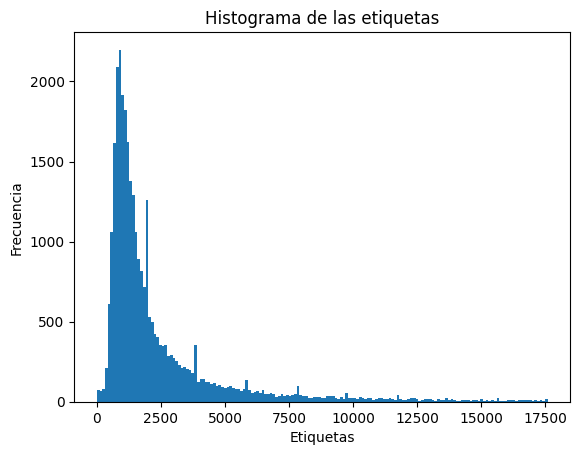

In [ ]:
lower_percentile = np.percentile(trainY, 0)  # Percentil 2.5
upper_percentile = np.percentile(trainY, 97.5)  # Percentil 97.5

# Dibujar el histograma
plt.hist(trainY, bins='auto', range=(lower_percentile, upper_percentile)) #bins 'auto' permite seleccionar a la función automaticamente el número de rangos que crear

plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.title('Histograma de las etiquetas')

# Mostrar el histograma
plt.show()

En este nuevo histograma podemos observar mejor la frecuencia de etiquetas entre el conjunto de muestras. Se puede ver como existe un claro desequilibrio en el conjunto de muestras ya que el número de muestras con valor entre 0 y 5000 es mucho mayor que el número de muestras con valor mayor que 5000.
Debido a este desequilibrio del conjunto de datos, las variables utilizadas pueden tener un mayor impacto a la hora de estimar las muestras con valores más atípicos en el conjunto de datos y por tanto hay que ser más cautelosos con la anulación de variables y la regularización ya que, variables que se consideren menos importantes para la mayoría de los datos pueden ser imporantes para predecir muestras con valores más extremos que existen en el conjunto como hemos visto anteriormente.

>**Escala del Conjunto de Datos**

Voy a analizar los máximos y mínimos que toman las variables del conjunto de datos de entrenamiento para observar si hay diferencias de escalas entre los distintos parámetros de las muestras. Es importante destacar que estos análisis de los datos han de hacerse únicamente en el conjunto de entrenamiento ya que el econjunto de test es el que será utilizado para evaluar el modelo final y las elecciones tanto del modelo como de las transformaciones no deben influenciarse por la información de este conjunto, y así evitar cometer Data Snooping.

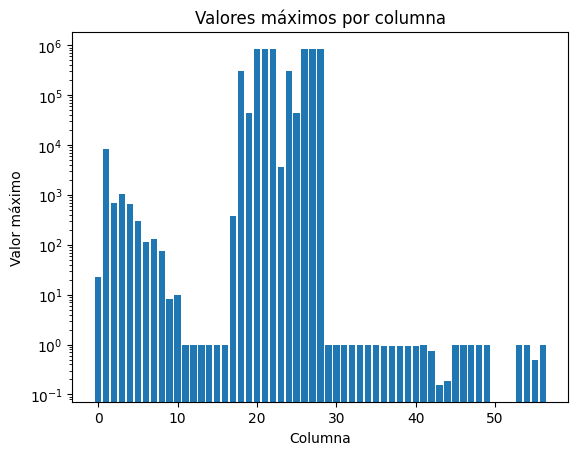

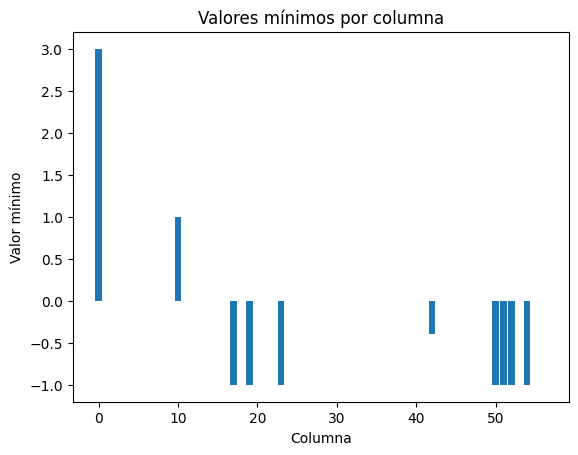

In [ ]:
preproc_trainX = trainX.copy()
preproc_testX = testX.copy()
# Obtener el valor máximo y mínimo de cada columna en el conjunto de entrenamiento
max_values = np.max(preproc_trainX, axis=0)
min_values = np.min(preproc_trainX, axis=0)

# Crear los nombres de las columnas
column_names = np.arange(len(max_values))

# Crear histograma de los valores máximos
plt.bar(column_names, max_values)
plt.yscale('log') #Escala logarítmica del eje y
plt.xlabel('Columna')
plt.ylabel('Valor máximo')
plt.title('Valores máximos por columna')
plt.show()

# Crear histograma de los valores mínimos
plt.bar(column_names, min_values)
plt.xlabel('Columna')
plt.ylabel('Valor mínimo')
plt.title('Valores mínimos por columna')
plt.show()

Como podemos observar en los dos histogramas, los valores máximos de las variables difieren en gran medida, y por tanto podemos aplicar un método de escalado de los datos para que todos los datos se encuentren en la misma escala y así evitar que una variable domine durante el ajuste del modelo. Como podemos observar en los valores mínimos, se tienen variables negativas y por tanto podemos usar un método de escalado que transforme los datos a una escala entre -1 y 1, para que pueda seguir habiendo variables negativas. Este escalado se realiza en el apartado 4). Se ha aplicado una escala logaítmica al eje y para poder visualizar el gráfico de máximos con más claridad.

Ahora voy a analizar si hay alguna variable que sea constante, esto se puede implementar de muchas maneras, pero si se realiza la resta de los valores máximos menos los valores mínimos, solo las variables constantes tendrán resta 0, y de esta manera utilizamos la información que ya teníamos antes sobre los máximos y mínimos.

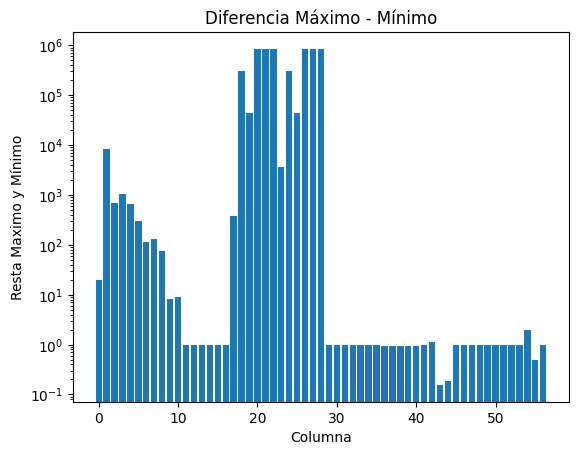

In [ ]:
# Crear histograma de las desviaciones estandar
plt.bar(column_names, max_values-min_values)
plt.xlabel('Columna')
plt.yscale('log') #Escala logarítmica del eje y
plt.ylabel('Resta Maximo y Mínimo')
plt.title('Diferencia Máximo - Mínimo')
plt.show()

Como pdoemos observar en el histográma de las diferencias entre los máximos y mínimos, no existen variables constantes. Se ha aplicado una escala logaítmica al eje y para poder visualizar el gráfico con más claridad.

In [ ]:
variables_ctes = []
for i in range(len(max_values)):
  if(max_values[i]  == min_values[i]): # es equivalente que sean iguales a que su resta sea 0
    print('La variable {} es constante'.format(i))
    variables_ctes.append(i)
if(len(variables_ctes) == 0):
  print('No hay variables constantes')

No hay variables constantes


Con este último algoritmo hemos detectado de manera precisa que no hay variables constantes en el conjunto de datos. Este tipo de variables no proporcionan información sobre cada muestra ya que todas las muestras tienen el mismo valor para ese tipo de variables y por tanto al no tener variabilidad no contribuye al modelo para predecir y diferenciar entre ambas clases, por lo tanto si hubiese se podrían eliminar del conjunto de datos.

>**Outliers**

Tras realizar validación cruzada con los modelos elegidos que se comentarán más adelante y obtener las evaluaciones de la métricas que también se explican en un apartado posterior, obtenía valores de los errores muy elevados. Tras realizar un análisis más exhaustivo de las variables, comparando con los valores máximos, mínimos que se muestran en las tablas anteriores, encontré una variable que se trataba de un ratio, la variable:  
*  5:	n_non_stop_words	Rate of non-stop words in the content    

y el valor máximo de la variable muy elevado para encontrarse en un ratio de palabras que son del tipo "non stop" de entre todas las palabras del contenido, y por tanto existía una muestra con valor mayor que 1, alrededor del valor 1000. Por ello, como ese valor no es posible para es variable, ya que se trata de un ratio, de un valor entre 0 y 1, he decidido calsificar la muestra com un error de medición, un outliner, y la he eliminado para que no afecte al proceso de aprendizaje;

In [ ]:
variables_atip = []
for i in range(len(preproc_trainX)):
  if(preproc_trainX[i,3]  >1): # la variable era la 3 despues de eliminar las dos primeras
    print('La muestra {} es atípica, valor:{} '.format(i,preproc_trainX[i,3]))
    variables_atip.append(i)
# Mostrar dimension del conjunto de muestras
print("Forma de vector X de muestras:", preproc_trainX.shape)
print("Forma de vector Y de etiquetas:", trainY.shape)

La muestra 3039 es atípica, valor:1042.0 
Forma de vector X de muestras: (31715, 57)
Forma de vector Y de etiquetas: (31715,)


In [ ]:
preproc_trainX = np.delete(preproc_trainX, variables_atip, axis=0)
trainY = np.delete(trainY, variables_atip, axis=0)
# Mostrar dimension del conjunto de muestras
print("Forma de vector X de muestras:", preproc_trainX.shape)
print("Forma de vector Y de etiquetas:", trainY.shape)

Forma de vector X de muestras: (31714, 57)
Forma de vector Y de etiquetas: (31714,)


vemos que se ha eliminado correctamente

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos.

Para este problema de regresión voy a utilizar regresión linal implementada mediante la pesudoinversa, ya que con ese método el algoritmo obtiene el clasificador óptimo de menor error en la función de pérdida de regresión en un solo paso. Además, utilizando el mismos modelo voy transformar el problema realizando una transformación polinomial de las variables del conjutno de datos que obtendrá un nuevo espacio paramétrico del problema donde se aplicará el modelo de regresión lineal para tratar de obtener una predicción mejor en este nuevo espacio.

Regresión lineal puede ser implementado mediante el gradiente de descendiente GD o el gradiente de descenciente de SGD como muchos otro modelos que utilizan este algoritmo de aprendizaje para tratar de minimizar el error de la función de pérdida del modelo. Sin embargo, a diferencia de otros modelos que utilizan estos algoritmos, en regresión lineal se puede obtener el estimador con el error mínimo en un solo paso utilizando la propiedades de la matrices como la propiedad de las matrices de la descomposición en valores singualres. Gracias a esto se puede obtener mediante el cálculo de la inversa y multiplicaciónes de matrices el clasificador óptimo. Es por esto que el método de la pseudoinversa es el más utilizado ya que teóricamente, al obtener el error óptimo en entrnameiento, es el mejor método para obtener la hipótesis final comparando con Gradiente Descdendiente o SGD, aunque en la práctica, como el error de entrenameinto no representa directamente el error fuera de la muestra, y generlamente difieren en su valor, puede llegar a obtener peores resultados que los otros métodos.

La clase de funciones $\mathcal{H}$ del modelo de regresión lineal se basa en funciones lineales que son combinaciones lineales de las características de entrada aplicando unos pesos $w$ que son los parámetros que el modelo ajusta durante el aprendizaje. El valor obtenido como resultado de la combinación lineal es directamente la predicción que se calcula de la muestra. La clase de funciones del modelo de regresión lineal es:

> $\mathcal{H} = \{ h_w|
h_w(x) = w^tx, \ para \ w \ fijado\}$  

donde el número de valores de $w$ dependerá del número de parámetros de cada muestra del conjunto de datos.





#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos.

En el apartado 1 ya se ha unido en un solo conjunto todos los datos y han sido separados en training y test con una distribución de 80% training y 20% test como se ha comentado en ese apartado. En el apartado 1) ya se ha explicado las ventajas e inconvenientes de utilizar distintas distribuciones para separar los datos en entrenamiento y test.

>**V-Fold Cross Validation**

La técnica de validación cruzada con V-folds es un método utilizado para evaluar el rendimiento de un modelo de aprendizaje automático de manera más robusta y precisa. Permite utilizar todo el conjunto de datos disponible para entrenar y evaluar el modelo.Esta técnica se basa en dividir el conjunto de datos en V partes iguales (folds) donde cada uno actúa como conjunto de validación una vez, mientras que los subconjutnos restantes se utilizan como conjunto de entrenamiento para ajustar el modelo.Por lo tanto, el modelo se entrena V veces, y en cada vez se utiliza un subconjunto diferente como conjunto de validación. Al final de cada iteración, se obtiene una medida del error o de las métricas elegidas para evaluar el modelo y finalmente se ofrece como estimación final el promedio de las mediciones realizadas en todas las iteraciones.

Al utilizar la técnica de V-fold cross-validation, se obtiene una evaluación más confiable del modelo, ya que se utiliza todo el conjunto de datos tanto para entrenar como para validar el modelo. Además, al repetir el proceso V veces con diferentes particiones del conjunto de datos, se reduce el impacto del sesgo en la estimación del rendimiento del modelo.

Un valor común para el número de particiones es V = 10, pero puede variar dependiendo del tamaño del conjunto de datos y de la cantidad de datos disponibles. Valores más pequeños de V pueden dar lugar a una estimación menos precisa, mientras que valores más grandes pueden resultar en un coste computacional mayor.

Incialmente traté de utilizar esta técnica de validación con los modelos elegidos, pero debido al alto coste computacional del modelo aplicado a los datos transformados polinomialmente, el tiempo necesario para evaluar diversos valores para el parámetro de regularización era demasiado y por tanto he decidido utilizar el error obtenido de entrenamiento para comparar los modelos y obtener la hipótesis final. Aunque la técnica de validación cruzada es más precisa para evaluar y comparar los modelos, al utilizar todo el conjunto de datos para entrenar, se utiliza una mayor cantidad de inforacmión del problema y por tanto generalmente se obtienen mejores resultados al entrenar el modelo. Utilizar el error de entrenamiento para comparar modelos es también una práctica válida ya que si se considera que la cantidad de muestras en el conjunto no es suficiente para obtener una buena generalización para el problema, utilizar un conjunto de muestras para validación esta restringiendo aún más el conjunto de datos y por tanto utilizar el conjunto entero para entrenamiento obtendrá mejores resultados partiendo de esta hipótesis.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas.

>**Escalado de los datos**

Como hemos analizado en el apartado 1), el conjutno tiene vairables cuyos valores se encunetran en escalas distintas, entonces para evitar que una característica domine sobre otras durante el ajuste del modelo voy a escalar el conjunto de datos. Como he explicado en el apartado 1) al analizar los máximos y mínimos, he visto que existían variables con valores negativos, y por tanto voy a utilizar la clase `StandardScaler` que escala los valores de las variables para que tengan media 0 y una desviación estándar de 1. De esta forma los valores pueden ser postivos, negativos y si había datos extremos, como en nuestro caso que hemos explicado en el apartado 1), podrán tener valores mayores en valor absoluto que 1. El mismo escalado que se aplica en entrenamiento tiene que aplicarse al conjunto de test y no se debe usar infromación del conjunto de test para realizar el escalado, por lo tanto utilizo el metodo `fit()` de `StandardScaler` con los datos de entrenamiento para realizar el mismo escalado, que se utiliza en entrenameinto con la infromación del conjunto de entrenameinto, con el conjunto de test.  


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Escalado StandardScaler
scaler = StandardScaler(
    copy=True,  # No realizar una copia de los datos de entrada antes de escalar (por defecto  True)
    with_mean=True,  # Centrar los datos alrededor de la media (por defecto True)
    with_std=True  # Escalar los datos para tener varianza unitaria (por defecto True)
)

# Ajustar el escalador a los datos de entrenamiento
scaler.fit(preproc_trainX)


# Escalado Min-Max
min_max_scaler = MinMaxScaler(
    feature_range = (0,1), # Rango al que escalar los datos
    copy = True # Evitar crear una copia de los datos y realizar el escalado directamente en los datos
)

#ajustar el escalador a los datos de entrenamiento
min_max_scaler.fit(preproc_trainX)


# Transformar los datos de entrenamiento y prueba
preproc_trainX = scaler.transform(preproc_trainX)
preproc_testX = scaler.transform(preproc_testX)

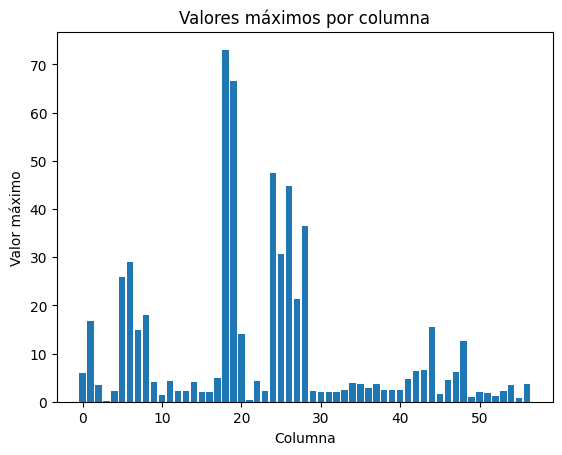

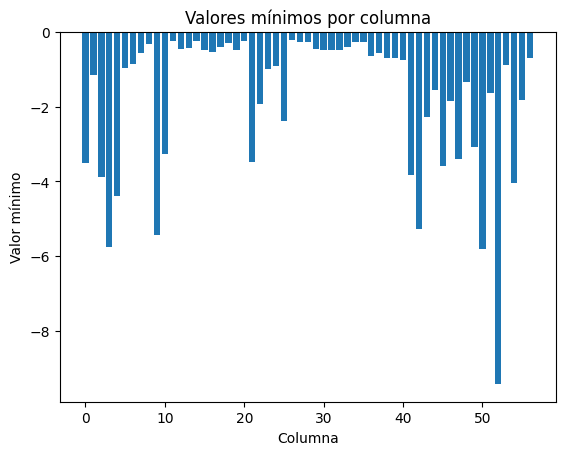

In [ ]:
# Obtener el valor máximo y mínimo de cada columna en el conjunto de entrenamiento
max_values = np.max(preproc_trainX, axis=0)
min_values = np.min(preproc_trainX, axis=0)

# Crear los nombres de las columnas
column_names = np.arange(len(max_values))

# Crear histograma de los valores máximos
plt.bar(column_names, max_values)
plt.xlabel('Columna')
plt.ylabel('Valor máximo')
plt.title('Valores máximos por columna')
plt.show()

# Crear histograma de los valores mínimos
plt.bar(column_names, min_values)
plt.xlabel('Columna')
plt.ylabel('Valor mínimo')
plt.title('Valores mínimos por columna')
plt.show()

Como podemos observar en los nuevos histogramas de los valores máximos y mínimos, los datos han sido escalados, ya que los valores máximos de las variables no son tan extremos como antes del escalado.

>**Outliers**


Los outliers, o valores atípicos, son observaciones o instancias que se alejan significativamente del resto de los datos en un conjunto de datos. Estos valores atípicos pueden aparecer debido a errores en la medición de los datos o cualquier fuente de ruido que afecte a algunas muestras en el conjunto de datos.Los outliers pueden tener un impacto significativo en el aprendizaje automático, ya que pueden transformar la distribución de los datos y afectar negativamente la calidad del modelo. Este tipo de muestras pueden introducir ruido en los datos e impedir que el modelo pueda separar las clases correctamente provocando una disminución en la precisión y el rendimiento general del clasificador.

Una técnica comúnm para tratar de identificar y eliminar los outliers y así reducir su impacto en el aprendizaje automático es el Análisis de Componentes Principales (PCA). PCA es una técnica de reducción de dimensionalidad que busca transformar un conjunto de variables correlacionadas en un conjunto de nuevas variables no correlacionadas y de esta forma reducir la influencia de los outliers y ayudar a mejorar el rendimiento de los modelos.

Los outliers pueden ser la principal fuente del error de un modelo pero trata de identificar y demostrar que una muestra se trata de un outlier es difícil y en muchos casos no se puede saber si la muestra es útil para el problema o se trata de ruido en los datos. Algunos valores extremos pueden ser muestras reales que el clasificador debe predecir y no necesariamente deben considerarse outliers. Por ejemplo, en el análisis de fraudes, los valores extremos pueden representar transacciones fraudulentas reales y no muestras generadas por ruido que no deben tenerse en cuenta. Es por esto que la clasificación de las muestras como outliers puede ser muy subjetivo y difícil de demostrar.

En nuestro conjunto de datos, ya he identificado una muestra como un outlier debido a la incoherencia del valor de algunas de sus variables, como he explicado en el primer apartado. A parte, se podría aplicar alguna técnica de detección y eliminado de outliers pero debido a la subjetividad que requiere el clasificar datos como outliers y la complejidad del análisis de este tipo de datos para obtener unos reusltados decentes, he decidido no emplear PCA en este conjunto de datos y tratar de resolverlo a pesar de este posible problema que puede estar presente en el conjunto de datos.

>**Transformación de los datos**

Como he comentado antes, a parte de utilizar el modelo de regresión lineal para tratar de resolver el problema utilizando directamente el conjunto de datos original (aplicando los procesos anteriores) también voy a realizar una transformación polinomial de segundo grado de las características para transformar el problema y obtener un nuevo espacio paramétrico ampliado donde también voy a emplear el modelo de regresión lineal. En este nuevo espacio paramétrico el conjunto de datos puede comportarse de manera distinta y tener distintas propiedades que, junto con el hecho de que al aumentar las carcterísticas el modelo se tiene mayor información del problema (obteniendo relacioens polinomiales de las características), pueden mejorar los resultados que el modelo puede llegar a obtener en el espacio paramétrico original.

Las transformaciones utilizadas son multilicaciones no lineales de grado dos sobre las varaibles originales del conjunto de datos, de modo que finalemente se obtienen como variables del nuevo espacio las originales junto con las transformaciones. De este modo por ejemplo si el numero de variables fuese 2 se tendría la siguiente transformación:  

$\phi_2(x) = (1, x_1, x_2, x_1x_2, x^2_1, x^2_2)$

Donde se han añadido la multiplicación de las dos variables y el cuadrado de cada uno de ellas

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos.

>**Métricas de Error**

Las métricas que voy a utilizar son:

*   Error cuadrático medio (MSE): esta métrica mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor más alto de MSE indica un mayor error en las predicciones.

*   Error absoluto medio (MAE): esta métrcia calcula el promedio de los errores absolutos entre las predicciones y los valores reales. Al igual que MSE, un valor más alto de MAE indica un mayor error en las predicciones.

*   R cuadrado (R2): esta métrica proporciona una medida de la calidad del ajuste del modelo. El valor de R2 está 0 y 1, donde 1 indica un ajuste perfecto del modelo y 0 indica que el modelo no se ha ajustado bien al problema y no sabe los motivos de la variabilidad de los datos y por tanto no predice las etiquetas con tanta precisión. Para calcular el valor de la métrcia se compara la suma de los cuadrados de las diferencias entre los valores reales y los valores predichos por el modelo con la suma de los cuadrados de las diferencias entre los valores reales y la media de los valores reales.

Las métrcias MSE y MAE son métrcias comunes para evaluar el rendimiento global de problemas de regresión. Ofrecen un error que se obtiene directamente de las diferencias entres los valores estimados por el modelo y los valores reales de las muestras. y por tanto son un indicador directo de la eficacia del modelo. La métrica R2 se enfoca principalmente a evaluar la calidad del modelo a la hora de analizar el problema y obtener conclusiones de los datos, ya que esta métrica ayuda a determinar si el modelo es capaz de explicar la razón y los motivos de la variabilidad de los datos, y por tanto si consigue identificar esta variabilidad, el modelo será capaz de predecir correctamente las etiquetas de muestras del problema en general.

>**Función de Pérdida**

La función de pérdida utilizada en regresión lineal es el error cuadrático medio (MSE) que se calcula como:
>$E_{in}(w) =\frac{1}{N} \sum_{n=1}^{N} (h_w(x_n) - y_n)^2= \frac{1}{N} \sum_{n=1}^{N} (w^Tx_n - y_n)^2$

Esta fucnión de pérdida mide el promedio de los errores cuadrados entre las predicciones del modelo y los valores reales del objetivo. Como los errores se elevan al cuadrado, los valores más grandes se penalizan más que los valores más pequeños. Esta penalización proporciona una medida intuitiva de la calidad del ajuste del modelo, ya que los errores grandes contribuyen significativamente al valor total del MSE.  

Debido a que el MSE eleva al cuadrado los errores, los errores más grandes tienen un impacto más significativo en el valor total del MSE. Esto significa que el modelo dará más importancia a reducir los errores grandes, lo que puede ser beneficioso en aplicaciones donde se debe penalizar los errores grandes y puede afectar a los valores del error al comparar modelos en problemas con algunos valores extremos o atípicos que pueden ser la principal fuente de error del modelo.

En este caso, y en la mayoría de problemas de regresión, esta función de pérdida es útil para ofrecer una medida directa sobre el error del modelo en el conjunto de datos, aunque hay que tener en cuenta las consideraciones previas.

#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto.

>**Regularización**

La regularización L2 y la regularización L1 son dos técnicas de regularización en aprendizaje automático para evitar el sobreajuste de los modelos y ofrecer un ajuste del modelo con menos variabilidad descontrolada. Ambas se basas en aplicar unos parámetros de regularización sobre el modelo durante el entrenamiento.

La regularización L2 (Ridge) tarata de penalizar los valores grandes de los coeficientes del modelo y tiende a reducirlos. Este tipo de regularización consigue que los coeficientes no nulos tienden a disminuir hacia cero, pero nunca se anulan por completo. Esto hace que la regularización L2 sea menos propensa a seleccionar características irrelevantes, anulando las importantes y por tanto sea más adecuada para conjuntos de datos con muchas características.

La regularización L1 (Lasso) penaliza los valores grandes de los coeficientes y también tiende a reducirlos. Esta regularización puede anular completamente los coeficientes y convertirlos en cero, lo que implica que puede elegir las características que consider más relevantes y anular las que considera menos relevantes. Esto hace que la regularización L1 sea útil en situaciones en las que se desea realizar una selección de características, pero también hace que no sea adecuada para conjuntos de datos donde se piensa que todas o casi todas las características son relevantes.

En este conjunto de datos, ya que existe un desequilibrio del conjunto al tener muestras concentradas en unos rangos de valores más que en otros, y como existen muestras con valores más extremos que el clasificador deber predecir también, ya que se tratan de artículos que han tenido más popularidad y por tanto han obtenido un número elevado de comparticiones, voy a utilizar la regularización L2 (Ridge) que no anula variables y por tanto tiene en consideración todas las variables del conjunto que pueden tener información necesaria para predecir correctamente este conjunto de datos con las características que acabo de mencionar.

>**Regresión Lineal (Sin transformación de los datos)**

Prámetros del modelo de Regresión Lineal empleando La pseudoinversa con regularización L2(Ridge) con la clase `Ridge`:

*   Alpha: es el parámetro de regularización en la Regresión Logística con SGD. Controla la fuerza de regularización que se pretende usar, cuanto mayor es el valor alpha, más regularización se aplica.

*   Max_iter: número máximo de iteraciones.(En este caso al usar pseudoinversa no es necesario)

*   Random_state: establece la semilla para los números aleatorios generados para desordenar los datos.
*   tol: tolerancia usada para el criterio de parada y convergencia del algoritmo. (En este caso al usar pseudoinversa no es necesario)
*   solver: algoritmo de parendizaje para resolver el problema. Al utilizar 'svd' se indica que el algoritmo es el de la pseudoinversa.

>**Regresión Lineal (Con transformación de los datos)**

El modelo utilizado es el mismo, regresión lineal, la unica diferencia es que en este caso el número de variables del conjunto de datos será significativamente mayor.

Para realizar la transformación se usa la función `PolynomialFeatures` con los parámetros `degree = 2`, para establecer el grado de la transformacion poliniomial a 2 y `interaction_only = False` para determinar que no se excluyan las variables originales y se utilicen las variables nuevas transformadas junto con ls originales. Después se utiliza la función `make_pipeline` para enlazar la transformación con el modelo e incluir dentro de todo el proceso de aprendizaje y estimación de muestras la propia transformación. Esta última función se le pueden pasar como parámetros los estimadores que se pretenden encadenar, que en nuestro caso son la transformación y el modelo de regresión. Los datos se podrían haber transformado antes y después haber utilizado el modelo con los datos en vez de concatenar el proceso y así evitar transformar los datos varias veces, pero realizando expermientos he comprobado que el ahorro en tiempo es mínimo y por comodidad se puede utilizar de la forma que he explicado.

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

Tras probar con valores extremos he conseguido acotar los valores de cada hiperparámetro para poder mostrar sus resultados en una tabla y elegir los hiperparámetros con los que se obtiene un mejor modelo entrenado de Regresión logística.  

En la tabla se representan las métricas que he comentado anteriormente junto con la función de pérdida, calculados a partir del modelo entrenado con todo el conjunto de entrenamiento.

El único hiperparámetro a elegir en ambos casos es el parámnetro de regularización L2 (Ridge). La propia clase `Ridge` incluye la parametrización L2 por defecto y su constante de regularización se elgie a partir del parámetro `alpha`.

>**Regresión Lineal (Sin transformación de los datos)**

In [ ]:
from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge

#Inicializar listas para guardar valores para la tabla
alphaTabla = []
mseTabla = []
maeTabla = []
r2Tabla = []

#Ejecutar el algoritmo con valores distintos para el paramtero de regularización
alphaValues = [0,0.00001,0.0001,0.001, 0.01, 0.1, 1,3,5,10,20]
for alpha in alphaValues:

  # Crear el modelo de regresión Ridge
  ridge_model = Ridge(
      alpha=alpha,  # Parámetro de regularización (1.0 por defecto)
      max_iter=None,  # Número máximo de iteraciones (None por defecto)
      tol=1e-3,  # Tolerancia para el criterio de parada (0.001 por defecto)
      solver='svd',  # Algoritmo para resolver el problema ('auto' por defecto)
      random_state=1  # Semilla para la generación de números aleatorios
  )

  # Entrenar el modelo con todos los datos de entrenamiento
  ridge_model.fit(preproc_trainX, trainY)

  # Obtener las predicciones del modelo utilizando todos los datos de entrenamiento
  y_pred = ridge_model.predict(preproc_trainX)

  #guardar datos para la tabla
  alphaTabla.append(alpha)
  #obtener y guardar los datos de los errores
  mseTabla.append(mean_squared_error(trainY, y_pred))
  maeTabla.append(mean_absolute_error(trainY, y_pred))
  r2Tabla.append(r2_score(trainY, y_pred))


#Crear DataFrame y mostrarlo
tableFrame = pd.DataFrame({'Parámetro de regularización': alphaTabla,'Error de entrenamiento (MSE)':mseTabla,
                           'MAE':maeTabla,'R2': r2Tabla})
display(tableFrame)

,Parámetro de regularización,Error de entrenamiento (MSE),MAE,R2
0,0.00000,1.487993e+08,3104.964736,0.022003
1,0.00001,1.488089e+08,3105.051789,0.021940
2,0.00010,1.488089e+08,3105.051787,0.021940
3,0.00100,1.488089e+08,3105.051767,0.021940
4,0.01000,1.488089e+08,3105.051570,0.021940
5,0.10000,1.488089e+08,3105.049592,0.021940
6,1.00000,1.488089e+08,3105.029897,0.021940
7,3.00000,1.488089e+08,3104.986699,0.021940
8,5.00000,1.488090e+08,3104.944161,0.021940
9,10.00000,1.488090e+08,3104.839399,0.021939


Podemos observar en la tabla que los resultados son muy parecidos entre sí aunque se observa una diferencia mínima en la métrcia R2 en el caso sin regularización. Por lo tanto el modelo de regresión lineal con mejores resultados sería el modelo ajustado sin regularización, a aprtir de estos datos

>**Regresión Lineal (Con transformación de los datos)**

In [ ]:
from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#Inicializar listas para guardar valores para la tabla
alphaTabla = []
mseTabla = []
maeTabla = []
r2Tabla = []

#Ejecutar el algoritmo con valores distintos para el paramtero de regularización
alphaValues = [0, 0.01, 0.1, 1]
for alpha in alphaValues:

  # Crear el modelo de regresión Ridge
  ridge_model = Ridge(
      alpha=alpha,  # Parámetro de regularización (1.0 por defecto)
      copy_X=True,  # Copiar los datos de entrada (True por defecto)
      max_iter=None,  # Número máximo de iteraciones (None por defecto)
      tol=1e-3,  # Tolerancia para el criterio de parada (0.001 por defecto)
      solver='svd',  # Algoritmo para resolver el problema ('auto' por defecto)
      random_state=None  # Semilla para la generación de números aleatorios
  )
  # Crear el modelo de Regresión Polinómica de grado 2
  polynomial_model = make_pipeline(
      PolynomialFeatures(
          degree=2, #grado de la transformacion
          interaction_only = False # Determinar si se excluyen las variables originales
          ), ridge_model)

  # Entrenar el modelo con todos los datos de entrenamiento
  polynomial_model.fit(preproc_trainX, trainY)

  # Obtener las predicciones del modelo utilizando todos los datos de entrenamiento
  y_pred = polynomial_model.predict(preproc_trainX)

  #guardar datos para la tabla
  alphaTabla.append(alpha)
  #obtener y guardar los datos de los errores
  mseTabla.append(mean_squared_error(trainY, y_pred))
  maeTabla.append(mean_absolute_error(trainY, y_pred))
  r2Tabla.append(r2_score(trainY, y_pred))


#Crear DataFrame y mostrarlo
tableFrame = pd.DataFrame({'Parámetro de regularización': alphaTabla,'Error de entrenamiento (MSE) con el conjunto de entrenamiento':mseTabla,
                           'MAE':maeTabla,'R2': r2Tabla})
display(tableFrame)

,Parámetro de regularización,Error de entrenamiento (MSE) con el conjunto de entrenamiento,MAE,R2
0,0.00,1.384178e+08,4332.746295,0.090236
1,0.01,1.325317e+08,3682.328939,0.128924
2,0.10,1.325317e+08,3682.136420,0.128923
3,1.00,1.325337e+08,3680.409678,0.128910


Podemos observar que el modelo sin regularización obtiene unos resultados peores en las métricas que aplicando la regularización, y el resto de modelos con distintos parámetros de regularización son muy parecidos, por lo tanto voy a elegir la constante de parametrización con la que se obtiene un menor error cuadrático medio que es con la constante $alpha = 0.01$, aunque la diferencia es mínima.

Comparando ambos casos, se puede observar que el modelo con a transformación obtiene unos mejores resultados en las métricas por tanto voy a utilizar el modelo escogido con la transformación como hipótesis final.

Por lo tanto ahora vamos a utilizar el conjunto de datos de test para evaluar el modelo elegido y estimar el error $E_{out}$ final del modelo:

In [ ]:
alpha = 0.01
# Crear el modelo de regresión Ridge
ridge_model = Ridge(
    alpha=alpha,  # Parámetro de regularización (1.0 por defecto)
    copy_X=True,  # Copiar los datos de entrada (True por defecto)
    max_iter=None,  # Número máximo de iteraciones (None por defecto)
    tol=1e-3,  # Tolerancia para el criterio de parada (0.001 por defecto)
    solver='svd',  # Algoritmo para resolver el problema ('auto' por defecto)
    random_state=None  # Semilla para la generación de números aleatorios
)
# Crear el modelo de Regresión Polinómica de grado 2
polynomial_model = make_pipeline(
    PolynomialFeatures(
        degree=2, #grado de la transformacion
        interaction_only = False # Determinar si se excluyen las variables originales
        ), ridge_model)

# Entrenar el modelo con todos los datos de entrenamiento
polynomial_model.fit(preproc_trainX, trainY)

# Obtener las predicciones del modelo utilizando todos los datos de entrenamiento
y_pred = polynomial_model.predict(preproc_trainX)

# Imprimir los resultados
print("Error en entrenameinto (MSE):", mean_squared_error(trainY, y_pred))
print("MAE en entrenameinto:", mean_absolute_error(trainY, y_pred))
print("R2 en entrenameinto:", r2_score(trainY, y_pred))

Error en entrenameinto (MSE): 132531650.37648459
MAE en entrenameinto: 3682.3289392074403
R2 en entrenameinto: 0.1289236128974851


In [ ]:
# Obtener las predicciones del modelo utilizando todos los datos de test
y_pred = polynomial_model.predict(preproc_testX)

# Imprimir los resultados
print("Error en test (MSE):", mean_squared_error(testY, y_pred))
print("MAE en test:", mean_absolute_error(testY, y_pred))
print("R2 en test:", r2_score(testY, y_pred))

Error en test (MSE): 162800761.2465369
MAE en test: 4152.805512048438
R2 en test: -1.4178479706753864


Como podemos observar, los resultados del error y las métricas en test se alejan de los resultados en entrenamiento, y esto puede ser por diversos motivos. Un motivo principal, que también puede que haya influido en obtener unos valores de las métricas tan elevados puede ser que el preprocesamiento de los datos que hemos realizado no haya sido suficiente y existan outliers o variables en el conjunto de datos que perjudican el ajuste y aprendizaje del modelo. Otro motivo por el cual los resultados en entrenamiento difieran de los obtenidos en test puede ser el uso del conjunto de muestras de entrenamiento completo para realizar el entrenameinto del modelo y no utilizar la técnica de validación cruzada para obtener una error y una evaluación del modelo más precisa y que se ajuste más a la realidad. Si se realizase un análisis mas exhaustivo sobre estos problemas para tratar de aplicar alguna técnica de preprocesado es posible que se obtuviesen mejores resultados.

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos.

Voy a crear las curvas de aprendizaje del modelo elegido separando de nuevo el conjunto de entrenamiento en un nuevo conjunto de validación del 20% y otro conjunto de entrenamiento del 80%, de forma parecida a como se hizo con el conjunto total de datos. Después voy a entrenar el modelo con un conjunto de datos inicialmente pequeño y obtengo el error de validación junto con el de entrenamiento, y cada iteración repito lo mismo pero con un sunconjunto de datos mayor obtenido del conjunto de entrenamiento hasta utilizar el conjunto de datos total. Finalmente se crear las curvas de los errores $E_{in}$ de entrenamiento y $E_{out}$ estimado a partid del error obtenido del conjunto de validación.

Debido al coste computacional tan elevado de aplicar la transformación y ajustar el modelo con los datos transformados, el tiempo necesario para crear las curvas de aprendizaje con los datostransformados es demasiado, por lo tanto, ya que se trata del mismo modelo pero simplemente transformando los datos antes de ajustar, voy a mostrar las curvas de aprendizaje del modelo sin realziar la transformación de los datos.

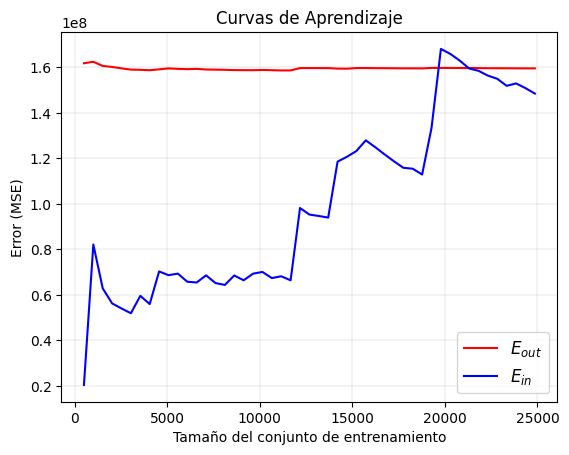

In [ ]:
alpha = 0.01
# Crear el modelo de regresión Ridge
ridge_model_Curvas = Ridge(
    alpha=alpha,  # Parámetro de regularización (1.0 por defecto)
    copy_X=True,  # Copiar los datos de entrada (True por defecto)
    max_iter=None,  # Número máximo de iteraciones (None por defecto)
    tol=1e-3,  # Tolerancia para el criterio de parada (0.001 por defecto)
    solver='svd',  # Algoritmo para resolver el problema ('auto' por defecto)
    random_state=None  # Semilla para la generación de números aleatorios
)

np.random.seed(1)
trainPortion = 0.8 #porcentaje de train, el porcentaje de validacion será la resta de 1 menos el porcentaje de train

indexesData = np.arange(len(trainY)) #Indices del conjunto de muestras

np.random.shuffle(indexesData) #Desordenar indices de las muestras
numberTrain = round(len(indexesData)*trainPortion) #numero de muestras para train
trainIndexes = indexesData[:numberTrain]
valIndexes = indexesData[numberTrain:]

E_in = []
E_out = []
ejeX = []
numiters = 50
for i in range(1,numiters):
  ejeX.append(i*len(trainIndexes)//numiters)
  # Entrenar el modelo con los datos de entrenamiento
  ridge_model_Curvas.fit(preproc_trainX[trainIndexes[:i*len(trainIndexes)//numiters]], trainY[trainIndexes[:i*len(trainIndexes)//numiters]])
  # Obtener error en entrenamiento
  y_pred = ridge_model_Curvas.predict(preproc_trainX[trainIndexes[:i*len(trainIndexes)//numiters]])
  E_in.append(mean_squared_error(trainY[trainIndexes[:i*len(trainIndexes)//numiters]], y_pred))
  # Obtener error en validación
  y_pred = ridge_model_Curvas.predict(preproc_trainX[valIndexes])
  E_out.append(mean_squared_error(trainY[valIndexes], y_pred))


plt.figure()
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error (MSE)")
plt.plot(ejeX, E_out, 'r',label=r'$E_{out}$')
plt.plot(ejeX, E_in, 'b',label=r'$E_{in}$')

plt.legend(fontsize = 12) # poner el tamaño de la leyenda como en el resultado dado
plt.grid(visible=True,linewidth=0.2) # poner la cuadricula con el grosor del resultado dado

plt.show()

Podemos observar en el gráfico de las curvas de aprendizaje que el modelo se comporta de forma correcta ajustandose al problema y obteniendo una buena generalización a medida que aumenta el tamaño del conjunto de muestras. Cuantos más datos se usan para entrenar el modelo, más generalización se consigue (al tener más información del problema y de la función objetivo) y por tanto el error $E_{out}$ se acerca cada vez más al error $E_{in}$. El modelo lineal es capaz de ajustar mejor los datos cuanto menos haya, ya que al haber menos datos, el modelo tiene que predecir menos muestras y entonces puede ajustarse mejor a una cantidad menor de datos, por lo tanto el error $E_{in}$ aumenta con el tamaño del conjunto de entrenamiento. Por otro lado, podemos observar que el error $E_{out}$ no disminuye con el aumento del tamaño de los datos, y esto puede ser debido a que la complejidad del modelo no es suficiente para ajustar correctamente el problema y por tanto aunque se utilice una cantidad mayor de los datos, el modelo no es capaz de ajustarse al problema y por tanto sigue obteniendo un error $E_{out}$ constante y elevado. La clase de funciones de este modelo $\mathcal H$ no es suficientemenete grande y compleja y por tanto no contiene funciones que se aproximen correctamente a la función objetivo. Por lo tanto partiendo de esta hipótesis, el problema no se puede resolver utilizando un modelo simple como el que hemos implementado, sino que habría que utilizar modelos más complejos que se pudiesen ajustar a los propios datos del problema en el entrenamiento y así obtener mejores resultados globales.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos.

Tal y como he explicado en esta práctica, realizaría los siguientes pasos:


1.   Separar el conjunto de datos en una parte de entrenameinto y otra de test
2.   Analizar el problema observando de donde proceden los datos, que variables se utilizan y de que tipo, como se han extraido los datos y elegir los modelos que se pretenden usar para ajustar este problema específico.
3.   Analizar el conjunto de datos de training para tratar de encontrar variables constantes, desequilibrio en las clases y cualquier peculiaridad más del conjunto de entrenamiento.
4.   Preprocesar los datos codificando las varaibles que sean necesarias como las categóricas, escalar los datos y aplicar cualquier procesamiento necesario al conjutno de datos.
5.   Establecer la técnica de Validación cruzada eligiendo el número de particiones si los datos son suficientes como para permitirlo.
6.   Establecer las métrcias que son necesarias dependiendo del conjunto de datos y los hiperparámetros que se van a escoger experimentalmente junto con la regularización elegida para el conjutno de datos en concreto.
7.   Realiza la técnica de Validación cruzada para elegir los hiperparámetros de los modelos y evaluar los resultados para obtener la mejor hipótesis final para el problema.
8.   Estimar el error  $E_{out}$ a partir del conjunto de test y evaluar los resultados obtenidos finales. Este modelo sería el modelo que se porpondría a la empresa junto con el error $E_{out}$ estimado a partir del error $E_{test}$.

Durante los apartados anteriores he explicado los motivos que me han llevado a tomar cada decisión justificando las ventajas y desventajas de realizar cada paso.

La técnica de validación cruzada la utilizaría siempre que el coste computacional me lo permita, ya que he comprobado en esta práctica que en algunos casos el tiempo necesario para realizar la técnica es demasiado elevado y por tanto habrá que utilizar el conjunto de entrenamiento completo para entrenar el modelo y el error $E_{in}$ del entrenamiento como indicativo de la calidad de los resultados para elegir los parámetros y el modelo final.


El error $E_{out}$ sería una estimación de este error a partir del error $E_{test}$ obtenido mediante el conjunto de test que he separado de los datos que me ofrece la empresa. Por lo tanto el error $E_{out}$ sería el error $E_{test}$ que obtengo a partir de mi modelo final que he elegido como mejor modelo. Este estimador del error $E_{out}$ es el mejor estimador debido a la teoría de la dimensión de Vapink-Chervonenkis junto con la teoría desarrollada en torno a la desigualdad de Hoeffding que ofrecen unas cotas del error $E_{out}$ en torno a los valores que se pueden obtener de los errores $E_{test}$ y $E_{in}$. Sin embargo, el uso de un conjunto de test implica un entrenamiento del modelo con un conjunto de datos menor, lo que afectará a la generalización y ajuste del prblema y por lo tanto a los resultados obtenidos. Cuanto mayor sea el conjunto de test, mejor será la estimación del error $E_{out}$ y peores resultados de entrenameinto se obtendrán, es por eso que se debe elgir un equilibrio entre una mejor estimación y un entrenamiento mejor.  

En algunos casos, si los datos son escasos o se considera que no son suficientes, se podría utilizar todo el conjunto de datos como entrenamiento y estimar el error $E_{out}$ a partir del error $E_{in}$ del entrenamiento. Este es el caso extremo de obtener un peor estimador pero entrenar con un conjunto mayor de datos puede dar lugar a obtener mejores resultados en el ajuste del modelo.

Esto ocurre también con Cross-Validation donde se utiliza una parte del conjunto de entrenamiento para validar y obtener una estimación del error del modelo. Al realizar diversas particiones y estimar con un conjunto de validación distinto cada vez se puede obtener un buen estimador del error realizando el promerdio de todas las particiones pero esto conlleva un aumento del coste computacional a parteque puede dificultar el proceso de aprendizaje del modelo.

En el problema que se ha tratado de resolver mediante aprendizaje automático en los apartados anteriores, he explicado cuál era el mejor modelo que se ha conseguido obtener y yo propondría ese modelo para resolver este problema con el error $E_{out}$ que se ha estimado a partir del error $E_{test}$. Si además se disponde del conjunto de test, yo, personalmente, ofrecería como error del modelo el error $E_{test}$ obtenido a partir del modelo entrenado con los datos de entrenamiento, y después volvería a entrenar el modelo con el conjunto total de los datos (test incluido) y ofrecería ese modelo como modelo final. Como este modelo ha sido entrenado con una cantidad mayor de datos, el error proprocionado $E_{test}$ será una cota superior del error $E_{out}$ del modelo final y por tanto el error ofrecido será pesimista. Si por el contrario no se disponde del conjunto de test y la empresa se encarga de realiza el test conotro conjunto de datos, aun así del conjunto que se disponde crearía mis propias particiones como se ha comentado antes en entrenameinto y test y se haría el mismo proceso siguiendo los pasos.